<a href="https://colab.research.google.com/github/Altemir1/Deep-Learning-using-Fastai/blob/main/Neural_Network_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ipywidgets import interact
import torch
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

Quadratic equations as model of the data

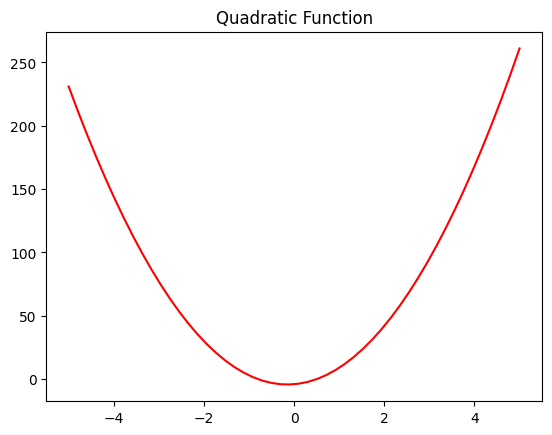

In [10]:
def plot_function(f, title=None):
  x = torch.linspace(-5, 5, 50)
  plt.plot(x, f(x), color="red")
  if title != None:
    plt.title(title)


def quadratic_function(a, b, c, x):
  return a*x**2 + b*x + c

def make_quadratic_function(a, b, c):
  return partial(quadratic_function, a, b, c)


f = make_quadratic_function(10, 3, -4)
plot_function(f, "Quadratic Function")


Adding noise to the quadratic function

In [3]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1 + noise(x,mult)) + noise(x, add)

In [4]:
x = torch.linspace(-5, 5, 100)
y = add_noise(f(x), 0.15, 1.5)

/tmp/ipython-input-3-2049799688.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1 + noise(x,mult)) + noise(x, add)


Text(0.5, 1.0, 'Data representation with noise')

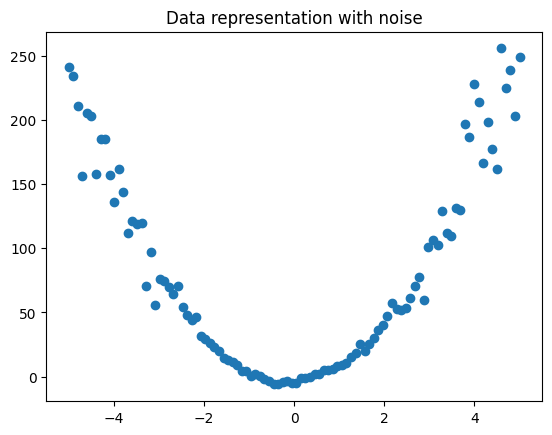

In [5]:
plt.scatter(x, y)
plt.title("Data representation with noise")

Simulating loss funciton on fitting data to model

In [14]:
def mae(pred, actual): return (torch.abs(pred-actual)).mean()


@interact(a=(0, 30, 0.5), b=(0, 10, 0.5), c=(-10, 20, 0.5))
def model_quad_on_data(a, b, c):
  plt.scatter(x,y)
  loss = mae(make_quadratic_function(a, b, c)(x), y)
  plt.title(f"Loss: {loss}")
  plot_function(make_quadratic_function(a, b, c))

interactive(children=(FloatSlider(value=15.0, description='a', max=30.0, step=0.5), FloatSlider(value=5.0, des…

Calculating gradients

In [23]:
def quad_mae(params):
  f = make_quadratic_function(*params)
  return mae(f(x), y)

quad_mae([1, 2, 3])

tensor(71.8839, dtype=torch.float64)

In [24]:
abc = torch.tensor([10.0, 3.0, -4.0])
abc

tensor([10.,  3., -4.])

In [25]:
abc.requires_grad_()

tensor([10.,  3., -4.], requires_grad=True)

In [26]:
loss = quad_mae(abc)
loss

tensor(9.5194, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [27]:
loss.backward()

In [28]:
abc.grad

tensor([-0.3462,  0.9232, -0.0400])

In [29]:
with torch.no_grad():
  abc -= abc.grad * 0.01
  loss = quad_mae(abc)

print(loss)

tensor(9.5096, dtype=torch.float64)


Manual loop for finding optimal paramters

In [37]:
for i in range(1, 10):
  loss = quad_mae(abc)
  print(f"Loss: {loss}")
  loss.backward()
  with torch.no_grad():
    abc -= abc.grad * 0.01

Loss: 11.055593564539816
Loss: 10.407353844205986
Loss: 9.743182530411932
Loss: 9.207792590521413
Loss: 8.964740952183858
Loss: 9.340385626361375
Loss: 10.021635955112906
Loss: 10.892137716300589
Loss: 11.607080647237401


Activation functions: ReLU

In [38]:
def rectified_linear(m, b, x):
  y = m*x + b
  return torch.clip(y, 0.)

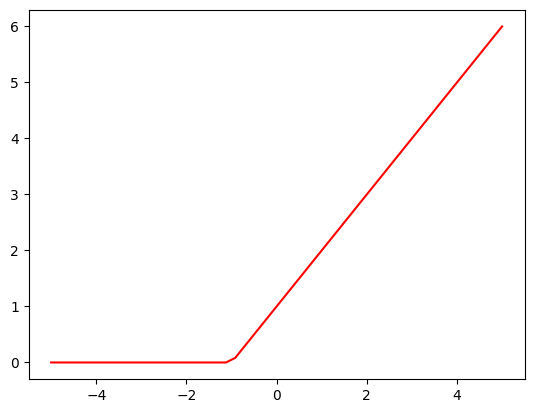

In [39]:
plot_function(partial(rectified_linear, 1, 1))

Text(0.5, 1.0, 'Rectified Linear Unit')

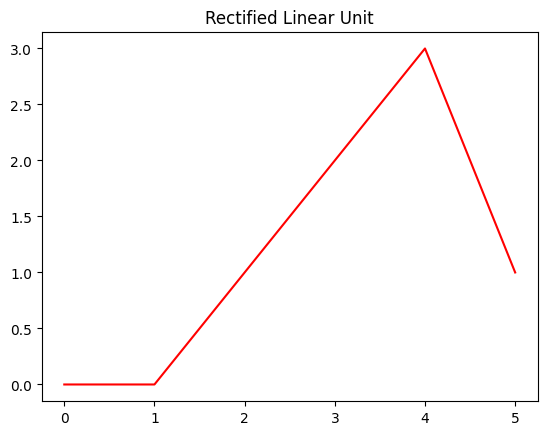

In [48]:
import torch.nn.functional as F
function = F.relu(torch.tensor([-1.,  -2., 1., 2., 3., 1.]))
plt.plot(function, color="red")
plt.title("Rectified Linear Unit")

Interactive plot relu

In [49]:
@interact(m=(1, 10), b=(-5, 5))
def plot_relu(m, b):
  plot_function(partial(rectified_linear, m, b))


interactive(children=(IntSlider(value=5, description='m', max=10, min=1), IntSlider(value=0, description='b', …

In [54]:
def triple_relu(m1, b1, m2, b2, m3, b3, x):
  return rectified_linear(m1, b1, x) + rectified_linear(m2, b2, x) + rectified_linear(m3, b3, x)

@interact(m1=(1, 100), b1=(-1, 30), m2=(1, 70), b2=(-50, 50), m3=(34, 130), b3=(54, 123))
def plot_double_relu(m1, b1, m2, b2, m3, b3):
  plot_function(partial(triple_relu, m1, b1, m2, b2, m3, b3))

interactive(children=(IntSlider(value=50, description='m1', min=1), IntSlider(value=14, description='b1', max=…